In [1]:
# Dataset Link= https://zenodo.org/records/3464319#.YUiSrrgzaUk

In [2]:
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.models import Sequential 
from keras.layers import Dense 
from keras.applications.vgg16 import VGG16 
from keras.applications.vgg16 import preprocess_input,decode_predictions
from PIL import Image 
import matplotlib.pyplot as plt 
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
train_files_path="airplanedataset/Train/"
test_files_path="airplanedataset/Test/"

img=load_img(test_files_path+"B-52/3-1.jpg")

In [4]:
print(img_to_array(img).shape)

(230, 266, 3)


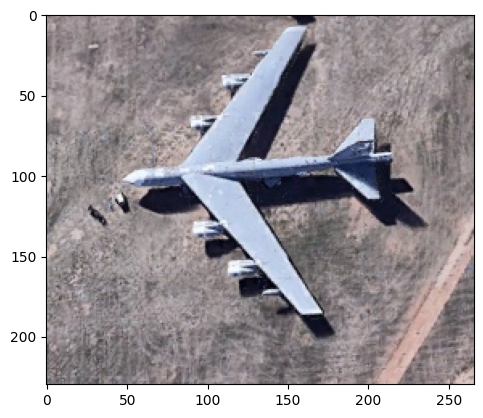

In [5]:
plt.imshow(img)
plt.show()

In [6]:
train_data=ImageDataGenerator().flow_from_directory(train_files_path,target_size=(224,224)) # 224 cause of vgg
test_data=ImageDataGenerator().flow_from_directory(test_files_path,target_size=(224,224))

Found 1812 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [7]:
numberOfAirplaneTypes=5

In [8]:
vgg=VGG16()

In [9]:
vgg_layers=vgg.layers
print(vgg_layers)

[<keras.src.engine.input_layer.InputLayer object at 0x00000176CAE4D570>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000176CD0264D0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000176CAEA0520>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x00000176CD1F43D0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000176CAE4DB40>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000176CD1F4FA0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x00000176CD1F68C0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000176CD1F70A0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000176CD1F6170>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000176CD1F7CD0>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x00000176CD258CD0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x00000176CD1F5480>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x0

In [10]:
# We want to include vgg's 15 layers because we want our outputs different and output layer is the last layer
vggmodel_layersize_to_be_used=len(vgg_layers)-1

model=Sequential()
for i in range(vggmodel_layersize_to_be_used):
    model.add(vgg_layers[i])

In [11]:
# We dont want to train all layers, and we add layer
for layers in model.layers:
    layers.trainable=False
    
model.add(Dense(numberOfAirplaneTypes,activation="softmax"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [13]:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [14]:
batch_size=4

In [15]:
model.fit_generator(train_data,
                    steps_per_epoch=400/batch_size,
                    epochs=3,
                    validation_data=test_data,
                    validation_steps=200/batch_size)

Epoch 1/3


100/100 [==============================] - 403s 4s/step - loss: 0.5974 - accuracy: 0.8328 - val_loss: 0.3756 - val_accuracy: 0.8800


In [16]:
img=Image.open("a10.jpg").resize((224,224))

In [17]:
img=np.array(img)

In [18]:
img.shape

(224, 224, 3)

In [19]:
print(img.ndim)

3


In [20]:
img=img.reshape(-1,224,224,3)

In [21]:
img=preprocess_input(img)

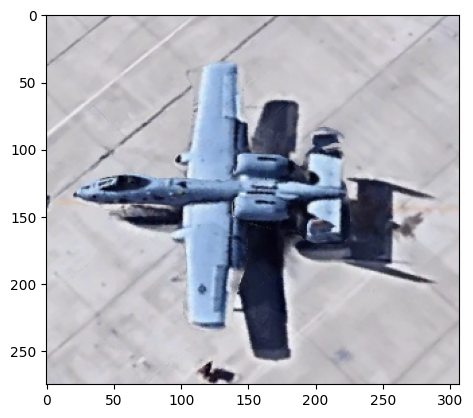

In [22]:
img_for_display=load_img("a10.jpg")
plt.imshow(img_for_display)
plt.show()

In [23]:
preds=model.predict(img)

1/1 [==============================] - 1s 653ms/step


In [24]:
preds

array([[0.8468551 , 0.00766916, 0.01276497, 0.07404829, 0.05866248]],
      dtype=float32)

These are the possibilities of each output (one-hot encoding)

Please remember the concept of Softmax:

For example, three class labels will be integer encoded as 0, 1, and 2. Then encoded to vectors as follows:

Class 0: [1, 0, 0]
Class 1: [0, 1, 0]
Class 2: [0, 0, 1]
This is called a one-hot encoding.

In our case:
A-10  Thunderbolt: [1,0,0,0,0]
Boeing B-52: [0,1,0,0,0]
.... 
like this..

For example, if the integer encoded class 1 was expected for example, the target vector would be:
[0, 1, 0]

The softmax output might look as follows, which puts the most weight on class 1 and less weight on the other classes.

For example in 3 output example above if we would have a softmax output like this: 
[0.09003057 0.67524096 0.23472847]

Then we can say the highest probability outcome is  0.67524096 which is Class 1.
I can find the index simply using numpy's argmax funxtion:

class integer = argmax([0.09003057 0.67524096 0.23472847])

In [25]:
air_classes=["A-10 Thunderbolt","Boeing B-52","Boeing E-3 Sentry","F-22 Raptor","KC-10 Extender"]

result=np.argmax(preds[0])
print(air_classes[result])

A-10 Thunderbolt


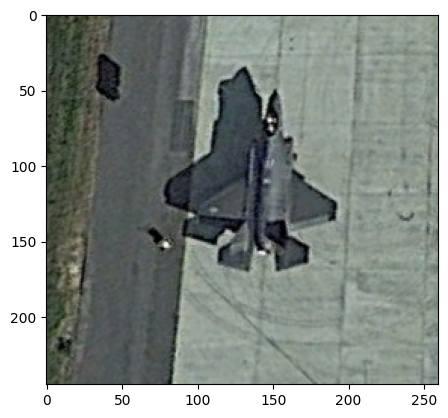

In [26]:
img=Image.open("f22.jpg").resize((224,224))
img=np.array(img)
img=img.reshape(-1,224,224,3)
img=preprocess_input(img)
img=preprocess_input(img)
img_for_display=load_img("f22.jpg")
plt.imshow(img_for_display)
plt.show()

In [27]:
preds=model.predict(img)
preds

1/1 [==============================] - 0s 304ms/step


array([[0.00289195, 0.0157858 , 0.00123393, 0.9546345 , 0.0254538 ]],
      dtype=float32)

In [29]:
result=np.argmax(preds[0])
print(air_classes[result])

F-22 Raptor


In [30]:
import pickle 

In [31]:
model_file="MilitaryAircraftClassification.pickle"

In [32]:
pickle.dump(model,open(model_file,'wb'))

In [ ]:
# load_model=pickle.load(open(file.pickle path,'r'))